In [146]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from darts import TimeSeries

In [148]:
df_raw = pd.read_csv("/content/drive/MyDrive/FP2 - data & code files/wfp_food_prices_ind.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,5,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [149]:
df = df_raw.dropna()
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
4,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197642,2022-10-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (masur),KG,forecast,Retail,INR,0.0,0.0
197643,2022-10-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (moong),KG,forecast,Retail,INR,0.0,0.0
197644,2022-10-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (urad),KG,forecast,Retail,INR,0.0,0.0
197645,2022-10-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,vegetables and fruits,Onions,KG,forecast,Retail,INR,0.0,0.0


In [150]:
#removing the first row as it wont be required:
df = df.iloc[1:]
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
4,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
5,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167


In [151]:
df['price'] = df['price'].astype(float)
df['price'] = np.where(df['unit']=='100 KG',df['price']/100,df['price'])
df.head()

<ipython-input-151-58c4fdd2a48e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(float)
<ipython-input-151-58c4fdd2a48e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = np.where(df['unit']=='100 KG',df['price']/100,df['price'])


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
4,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
5,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167


In [152]:
df.loc[df['unit']=='100 KG']

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
2420,2000-01-15,Bihar,Patna,Patna,25.6,85.116667,cereals and tubers,Rice,100 KG,actual,Wholesale,INR,8.000,18.3644
2422,2000-01-15,Bihar,Patna,Patna,25.6,85.116667,cereals and tubers,Wheat,100 KG,actual,Wholesale,INR,8.000,18.3644
2427,2000-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,100 KG,actual,Wholesale,INR,10.750,24.6771
2429,2000-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,100 KG,actual,Wholesale,INR,7.000,16.0688
2451,2000-01-15,Maharashtra,Mumbai city,Mumbai,18.975,72.825833,cereals and tubers,Rice,100 KG,actual,Wholesale,INR,11.365,26.0889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185379,2021-04-15,Maharashtra,Mumbai city,Mumbai,18.975,72.825833,cereals and tubers,Rice,100 KG,forecast,Wholesale,INR,0.000,0.0
185380,2021-04-15,Maharashtra,Mumbai city,Mumbai,18.975,72.825833,cereals and tubers,Wheat,100 KG,forecast,Wholesale,INR,0.000,0.0
185382,2021-04-15,Maharashtra,Mumbai city,Mumbai,18.975,72.825833,miscellaneous food,Sugar,100 KG,forecast,Wholesale,INR,0.000,0.0
185384,2021-04-15,Tamil Nadu,Chennai,Chennai,13.083333,80.283333,cereals and tubers,Rice,100 KG,forecast,Wholesale,INR,0.000,0.0


In [153]:
df.drop(df[df['priceflag'] == 'forecast'].index, inplace = True)
df.shape

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(184226, 14)

In [154]:
new_df = df.loc[:,['date','commodity','price']]
new_df

,date,commodity,price
1,1994-01-15,Rice,8.00
2,1994-01-15,Wheat,5.00
3,1994-01-15,Sugar,13.50
4,1994-01-15,Oil (mustard),31.00
5,1994-01-15,Rice,6.80
...,...,...,...
185011,2022-11-15,Lentils (masur),100.00
185012,2022-11-15,Lentils (moong),110.75
185013,2022-11-15,Lentils (urad),101.67
185014,2022-11-15,Onions,34.22


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'cereals and tubers'),
  Text(1, 0, 'miscellaneous food'),
  Text(2, 0, 'oil and fats'),
  Text(3, 0, 'pulses and nuts'),
  Text(4, 0, 'vegetables and fruits'),
  Text(5, 0, 'milk and dairy')])

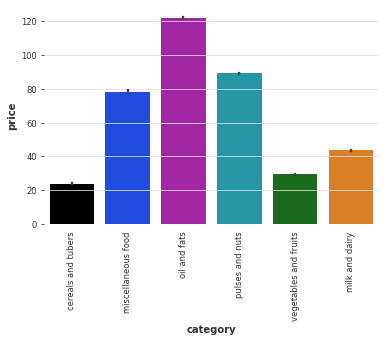

In [155]:
sns.barplot(df['category'],df['price'])
plt.xticks(rotation=90)

<AxesSubplot:>

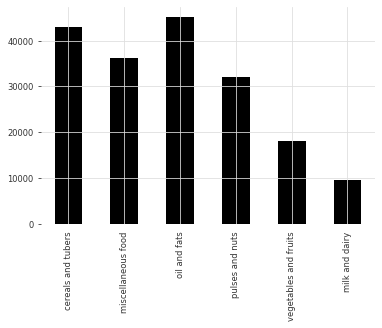

In [156]:
df.category.value_counts()[df.category.unique()].plot(kind='bar')

<AxesSubplot:>

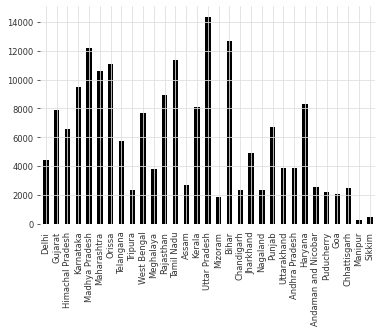

In [157]:
df.admin1.value_counts()[df.admin1.unique()].plot(kind='bar')

1.As we can see most of our datapoints are from Uttar Pradesh,Madhya Pradesh ,Bihar which can be explained as these states are much bigger in sizes area-wise ; so naturally they have more sub-zones with different prices of same commodities. We have very little data points from states like manipur & sikkim considering their smaller size.

2.Also, if we look at the previous plot; we can see we have price data more for cereals as India is a cereal producing country which exports cereals to otehr countries as well.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Rice'),
  Text(1, 0, 'Wheat'),
  Text(2, 0, 'Sugar'),
  Text(3, 0, 'Oil (mustard)'),
  Text(4, 0, 'Potatoes'),
  Text(5, 0, 'Chickpeas'),
  Text(6, 0, 'Onions'),
  Text(7, 0, 'Milk'),
  Text(8, 0, 'Wheat flour'),
  Text(9, 0, 'Milk (pasteurized)'),
  Text(10, 0, 'Salt (iodised)'),
  Text(11, 0, 'Oil (groundnut)'),
  Text(12, 0, 'Oil (palm)'),
  Text(13, 0, 'Oil (sunflower)'),
  Text(14, 0, 'Lentils (masur)'),
  Text(15, 0, 'Tomatoes'),
  Text(16, 0, 'Tea (black)'),
  Text(17, 0, 'Lentils'),
  Text(18, 0, 'Sugar (jaggery/gur)'),
  Text(19, 0, 'Ghee (vanaspati)'),
  Text(20, 0, 'Lentils (moong)'),
  Text(21, 0, 'Lentils (urad)'),
  Text(22, 0, 'Oil (soybean)')])

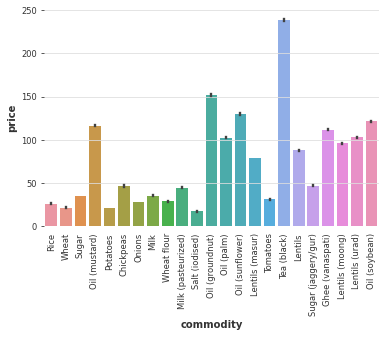

In [158]:
sns.barplot(df['commodity'],df['price'])
plt.xticks(rotation=90)

Looking at the plot above,we can conslude that Tea(black) is the costlist commodity in India amongst the commodities listed her.

Also, commodity gives us a detailed view of price distribution in data due to relatively higher classes in it.

In [159]:
df.commodity.unique()

array(['Rice', 'Wheat', 'Sugar', 'Oil (mustard)', 'Potatoes', 'Chickpeas',
       'Onions', 'Milk', 'Wheat flour', 'Milk (pasteurized)',
       'Salt (iodised)', 'Oil (groundnut)', 'Oil (palm)',
       'Oil (sunflower)', 'Lentils (masur)', 'Tomatoes', 'Tea (black)',
       'Lentils', 'Sugar (jaggery/gur)', 'Ghee (vanaspati)',
       'Lentils (moong)', 'Lentils (urad)', 'Oil (soybean)'], dtype=object)

In [160]:
df_onions = new_df[new_df['commodity'] == 'Onions']
df_onions['date'] = pd.to_datetime(df_onions['date'])
df_onions= df_onions.groupby('date')['price'].mean()
df_onions

<ipython-input-160-243c1c5f944d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_onions['date'] = pd.to_datetime(df_onions['date'])


date
2000-01-15     6.066667
2000-02-15     5.246667
2000-03-15     5.680000
2000-04-15     5.487500
2000-05-15     5.257500
                ...    
2022-07-15    25.301656
2022-08-15    25.518773
2022-09-15    25.588896
2022-10-15    27.528025
2022-11-15    30.861605
Name: price, Length: 275, dtype: float64

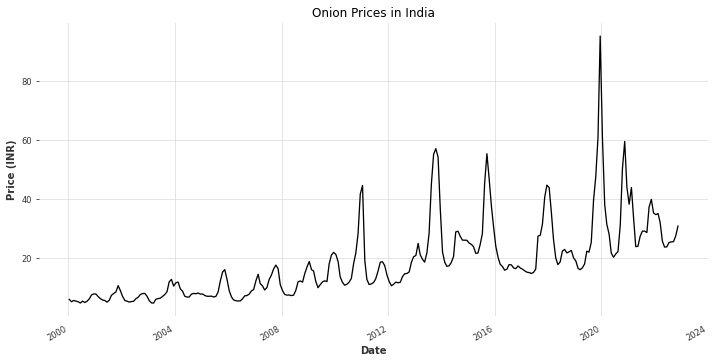

In [161]:
# create the plot
plt.figure(figsize=(12,6))
df_onions.plot(x='date', y='price')

# set the plot title and labels
plt.title('Onion Prices in India')
plt.xlabel('Date')
plt.ylabel('Price (INR)')

# show the plot
plt.show()

In [162]:
# Filter for commodity 'Onions'
df_onions4 = new_df[new_df['commodity'] == 'Onions']

# Group by date and take the mean of prices
df_onions_avg = df_onions4.groupby('date')['price'].mean().reset_index()

# Print the resulting dataframe
print(df_onions_avg)

           date      price
0    2000-01-15   6.066667
1    2000-02-15   5.246667
2    2000-03-15   5.680000
3    2000-04-15   5.487500
4    2000-05-15   5.257500
..          ...        ...
270  2022-07-15  25.301656
271  2022-08-15  25.518773
272  2022-09-15  25.588896
273  2022-10-15  27.528025
274  2022-11-15  30.861605

[275 rows x 2 columns]


In [163]:
df_onions_avg['date'] = pd.to_datetime(df_onions_avg['date'], format='%Y-%m-%d')


In [164]:
df_onions_avg.head()

,date,price
0,2000-01-15,6.066667
1,2000-02-15,5.246667
2,2000-03-15,5.680000
3,2000-04-15,5.487500
4,2000-05-15,5.257500


In [165]:
# create a Darts TimeSeries object
series = TimeSeries.from_dataframe(df_onions_avg, value_cols=['price'], freq='MS')

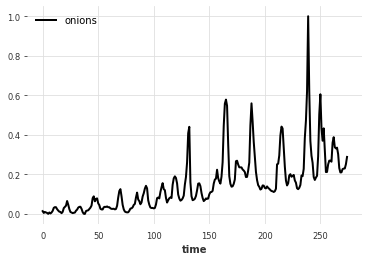

In [166]:
from darts.dataprocessing.transformers import Scaler
scaler_onions = Scaler()
series_onions_scaled = scaler_onions.fit_transform(series)


series_onions_scaled.plot(label='onions')

plt.legend();

In [167]:
series_onions_scaled

<TimeSeries (DataArray) (time: 275, component: 1, sample: 1)>
array([[[1.39881132e-02]],

       [[4.91474249e-03]],

       [[9.70961320e-03]],

       [[7.57958410e-03]],

       [[5.03461425e-03]],

       [[2.76627157e-04]],

       [[7.33061966e-03]],

       [[2.24067997e-03]],

       [[7.10931793e-03]],

       [[1.54634581e-02]],

...

       [[3.35175986e-01]],

       [[3.02607288e-01]],

       [[2.32199128e-01]],

       [[2.09794205e-01]],

       [[2.10460147e-01]],

       [[2.26824935e-01]],

       [[2.29227348e-01]],

       [[2.30003262e-01]],

       [[2.51459891e-01]],

       [[2.88346244e-01]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 6 7 ... 267 268 269 270 271 272 273 274
  * component  (component) object 'price'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [168]:
# Use the last 11 values for testing
train_onions = series_onions_scaled[:-11]
test_onions = series_onions_scaled[-11:]

In [169]:
test_onions

<TimeSeries (DataArray) (time: 11, component: 1, sample: 1)>
array([[[0.33122921]],

       [[0.33517599]],

       [[0.30260729]],

       [[0.23219913]],

       [[0.20979421]],

       [[0.21046015]],

       [[0.22682493]],

       [[0.22922735]],

       [[0.23000326]],

       [[0.25145989]],

       [[0.28834624]]])
Coordinates:
  * time       (time) int64 264 265 266 267 268 269 270 271 272 273 274
  * component  (component) object 'price'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [170]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape, mae, mse, rmse

In [171]:
model_onions = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

In [172]:
model_onions.fit([train_onions], verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

MAPE = 34.78%
SMAPE = 43.36%
MSE = 0.01%
RMSE = 0.09%
MAE = 0.09%


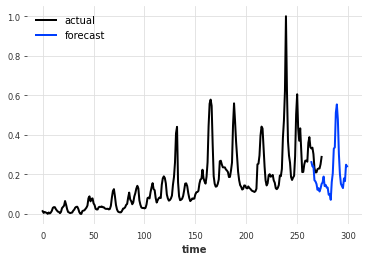

<Figure size 1080x432 with 0 Axes>

In [173]:
pred = model_onions.predict(n=36, series=train_onions)

series_onions_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend()
plt.figure(figsize=(15,6));
print('MAPE = {:.2f}%'.format(mape(series_onions_scaled, pred)))
print('SMAPE = {:.2f}%'.format(smape(series_onions_scaled, pred)))
print('MSE = {:.2f}%'.format(mse(series_onions_scaled, pred)))
print('RMSE = {:.2f}%'.format(rmse(series_onions_scaled, pred)))
print('MAE = {:.2f}%'.format(mae(series_onions_scaled, pred)))

In [174]:
# Retrieve the predicted values for future dates
predicted_values = pred.univariate_values()

# Print the predicted values
print(predicted_values)

[0.26210251 0.24058673 0.24044351 0.17049276 0.16431119 0.15135706
 0.12181244 0.12993777 0.11345354 0.12881559 0.15121961 0.15946246
 0.1888776  0.1409344  0.14680083 0.1335146  0.13304766 0.0969194
 0.10062753 0.07138999 0.16152067 0.20518699 0.3301684  0.33675995
 0.51236284 0.55393128 0.47677663 0.30367666 0.20207995 0.15221621
 0.14073859 0.13062758 0.17986661 0.16576667 0.24890213 0.24088783]


In [181]:
#transforming teh scaled values to their original values:
pred_unscaled = scaler_onions.inverse_transform(pred)
pred_unscaled

<TimeSeries (DataArray) (time: 36, component: 1, sample: 1)>
array([[[28.48984484]],

       [[26.54537016]],

       [[26.53242665]],

       [[20.21067244]],

       [[19.65201714]],

       [[18.4812959 ]],

       [[15.81122042]],

       [[16.54554159]],

       [[15.05579037]],

       [[16.44412549]],

...

       [[47.89087896]],

       [[32.24708123]],

       [[23.06534482]],

       [[18.55894158]],

       [[17.52165906]],

       [[16.60788313]],

       [[21.05782796]],

       [[19.78355537]],

       [[27.29686841]],

       [[26.57258166]]])
Coordinates:
  * time       (time) int64 264 265 266 267 268 269 ... 294 295 296 297 298 299
  * component  (component) object 'price'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None